In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame, concat
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import itertools
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from joblib import parallel_backend
from sklearn.model_selection import GridSearchCV
import sys
import os
from tensorflow import keras

# Prepare Exaggerate

In [3]:
# # load exaggerate dataset
# exaggerate = pd.read_csv('../exaggerate/data/working_sheet.csv', sep=";")
# target='death_aecopd' # aecopd_12m
# # rename variables for more practical handling
# exaggerate = exaggerate.rename(columns={
#     'sex': 'gender', 
#     'dyspnoea_mMRC': 'mmrc', 
#     'ami':'myocardial_infarct', 
#     'cbd':'stroke', 
#     'dyspnoea_yesno':'dyspnoea', 
#     target:'target'
# })
# relevant_vars=[
#     'gender', 
#     'age', 
#     'bmi', 
#     'sbp', 
#     'dbp', 
#     'diabetes', 
#     'heart_failure', 
#     'temperature',  
#     'dyspnoea', 
#     'mmrc', 
#     'target', 
#     'myocardial_infarct', 
#     'cancer', 
#     'stroke'
# ] #, 'rr', ', ,'prev_exacerb'

# # drop irrelevant variables
# exaggerate = exaggerate[relevant_vars]

# # sort columns
# exaggerate = exaggerate.reindex(sorted(exaggerate.columns), axis=1)

# # correct bmi scale.

# # if bmi is between 100 and 1000, then divide by 10 to get the correct scale
# exaggerate.loc[(exaggerate['bmi'] > 100) & (exaggerate['bmi'] < 1000), 'bmi'] = exaggerate['bmi'] / 10
# # if bmi is betweeen 1000 and 10000 then divide by 100 to get the correct scale
# exaggerate.loc[(exaggerate['bmi'] > 1000) & (exaggerate['bmi'] < 10000), 'bmi'] = exaggerate['bmi'] / 100

# # correct the temperature scale (if temperature is between 100 and 1000, then divide by 10 to get the correct scale)
# exaggerate.loc[(exaggerate['temperature'] > 100) & (exaggerate['temperature'] < 1000), 'temperature'] = exaggerate['temperature'] / 10

# # create fever variable
# exaggerate['fever'] = 0
# # according to CDC, john hopkins etc. fever is defined as a temperature of 38 degrees or higher
# exaggerate.loc[exaggerate['temperature'] > 38, 'fever'] = 1
# exaggerate = exaggerate.drop(columns=['temperature'])

# # if prev_exacerb is 1 or above then set it to 1 else 0
# # exaggerate.loc[exaggerate['prev_exacerb'] >= 1, 'prev_exacerb'] = 1

# # # create fast_breathing variable
# # exaggerate['fast_breathing'] = 0
# # # clinically normal respiratory rate is 12 - 20 anything above is considered fast breathing for adults
# # exaggerate.loc[exaggerate['rr'] > 20, 'fast_breathing'] = 1
# # exaggerate = exaggerate.drop(columns=['rr'])

# # plot_hist(exaggerate)

# ########
# # Missing values
# ########



# # print(exaggerate.shape)
# # drop rows with more than 85% missing values
# exaggerate = exaggerate.dropna(thresh=0.70*exaggerate.shape[1], axis=0)

# # drop all rows where mmrc is missing
# # exaggerate = exaggerate.dropna(subset=['mmrc'], axis=0)

# # reset index to be sequential again
# exaggerate = exaggerate.reset_index(drop=True)
# # print(exaggerate.shape)

# # print missing values in a table for each variable
# # print("missing values in the dataset: ")
# # print(exaggerate.isna().sum())


# # impute mmrc values using median and store it for later
# # mmrc = exaggerate['mmrc'].fillna(exaggerate['mmrc'].median())

# # imputer = IterativeImputer(random_state=42)
# # imputed = imputer.fit_transform(exaggerate)
# # exaggerate = pd.DataFrame(imputed, columns=exaggerate.columns)


# # plot 2x5 histograms for each variable


# # print missing values in a table for each variable
# # print("missing values in the dataset after: ")
# # print(exaggerate.isna().sum())

# numeric_vars = ['age', 'bmi', 'sbp', 'dbp']
# for var in numeric_vars:
#     exaggerate[var] = exaggerate[var].fillna(exaggerate[var].median())

# categorical_vars = ['gender', 'diabetes', 'heart_failure', 'mmrc', 'target', 'fever',   'dyspnoea', 'cancer',  'myocardial_infarct', 'stroke'] # , '', ,,'prev_exacerb' 'fast_breathing',
# for var in categorical_vars:
#     # exaggerate[var] = exaggerate[var].fillna(exaggerate[var].mode()[0])
#     # instead of mode use 0 for missing values
#     exaggerate[var] = exaggerate[var].fillna(2)


# # plot_hist(exaggerate)

# #########
# # Outliers
# #########

# # dealing with outliers is not necessary in this dataset

# ########
# # Feature Engineering
# ########

# # create a new variable for hypertension. If sbp variable is greater than 140 or dbp variable is greater than 90, then hypertension is 1, otherwise 0
# exaggerate['hypertension'] = 0
# exaggerate.loc[(exaggerate['sbp'] > 140) | (exaggerate['dbp'] > 90), 'hypertension'] = 1

# # drop sbp and dbp columns
# exaggerate = exaggerate.drop(columns=['sbp', 'dbp'])

# # drop mmrc column for now
# # exaggerate = exaggerate.drop(columns=['mmrc'])

# #Cardiovascular disease was defined as heart failure, acute myocardial infarction, cerebrovascular disease, or peripheral arterial disease


# ##########
# # Normalization
# ##########



# numeric_vars = ['age', 'bmi', 'mmrc']
# df_nr = exaggerate[numeric_vars]
# df_rest = exaggerate.drop(columns=numeric_vars)
# transf = MinMaxScaler(feature_range=(0, 1), copy=True).fit(df_nr)
# tmp = DataFrame(transf.transform(df_nr), index=exaggerate.index, columns=numeric_vars)
# exaggerate= concat([tmp, df_rest], axis=1)

# ############
# # Target variable
# ############

# # Binarize the target variable if data in target column is above 0, then set it to 1 else 0
# # print("target variable value counts: ")
# # print(exaggerate['target'].value_counts())
# exaggerate.loc[exaggerate['target'] > 0, 'target'] = 1


# # convert target to 4 classes like in harvard dataset
# # exaggerate_data.loc[(exaggerate_data['target'] > 1) & (exaggerate_data['target'] <= 5), 'target'] = 2
# # exaggerate_data.loc[(exaggerate_data['target'] > 5) & (exaggerate_data['target'] <= 10), 'target'] = 3
# # exaggerate_data.loc[(exaggerate_data['target'] > 10), 'target'] = 4
# # # add one to all target classes
# # exaggerate_data['target'] = exaggerate_data['target'] + 1

# exaggerate = exaggerate.reindex(sorted(exaggerate.columns), axis=1)
# exaggerate.to_csv('../exaggerate/data/imputed_hypertension.csv', index=False, sep=';')


# # print(exaggerate['target'].value_counts())

# # get rid of any nan values in the dataset
# exaggerate = exaggerate.dropna()

# # use smote to rebalance the exaggerate dataset in place
# print("perform smote")
# sm = SMOTE(random_state=42)
# X_res, y_res = sm.fit_resample(exaggerate.drop(columns=['target']), exaggerate['target'])
# X_res['target'] = y_res
# exaggerate = X_res

# # undersampling

# # # get number of underrespresented class 0
# # u = exaggerate['target'].value_counts().min()
# # u_label = exaggerate['target'].value_counts().idxmin()

# # # overrepresented class 1
# # o = exaggerate['target'].value_counts().max()
# # o_label = exaggerate['target'].value_counts().idxmax()

# # # add all underrepresented samples to a new dataframe
# # underrepresented = exaggerate[exaggerate['target'] == u_label]
# # # sample u number of overrepresented samples from the dataset
# # overrepresented = exaggerate[exaggerate['target'] == o_label].sample(n=u, random_state=42)
# # # concatenate underrepresented and overrepresented
# # exaggerate = pd.concat([underrepresented, overrepresented])



# # print(X_res['target'].value_counts())

# # print(exaggerate.head())
# # plot_hist(exaggerate)

# # TODO there is something wrong with target value distribution


# # sort the columns
# exaggerate = exaggerate.reindex(sorted(exaggerate.columns), axis=1)
# # convert all variables to int
# exaggerate = exaggerate.astype(int)

# # save the new dataset
# exaggerate.to_csv('../exaggerate/data/harvard_cv.csv', index=False, sep=';')

perform smote


In [13]:
# load exaggerate dataset
exaggerate = pd.read_csv('../exaggerate/data/working_sheet.csv', sep=";")
target='death_aecopd' # aecopd_12m
# rename variables for more practical handling
exaggerate = exaggerate.rename(columns={'sex': 'gender', 'dyspnoea_mMRC': 'mmrc', 'ami':'myocardial_infarct', 'cbd':'stroke', 'dyspnoea_yesno':'dyspnoea', target:'target'})
relevant_vars=exaggerate.columns
# ['gender', 'age', 'bmi', 'sbp', 'dbp', 'diabetes', 'heart_failure', 'temperature',  'dyspnoea', 'mmrc', 'target', ] #'cancer', 'rr', 'myocardial_infarct', 'stroke','prev_exacerb'

# drop irrelevant variables
exaggerate = exaggerate[relevant_vars]

# sort columns
exaggerate = exaggerate.reindex(sorted(exaggerate.columns), axis=1)

# correct bmi scale.

# if bmi is between 100 and 1000, then divide by 10 to get the correct scale
exaggerate.loc[(exaggerate['bmi'] > 100) & (exaggerate['bmi'] < 1000), 'bmi'] = exaggerate['bmi'] / 10
# if bmi is betweeen 1000 and 10000 then divide by 100 to get the correct scale
exaggerate.loc[(exaggerate['bmi'] > 1000) & (exaggerate['bmi'] < 10000), 'bmi'] = exaggerate['bmi'] / 100

# correct the temperature scale (if temperature is between 100 and 1000, then divide by 10 to get the correct scale)
exaggerate.loc[(exaggerate['temperature'] > 100) & (exaggerate['temperature'] < 1000), 'temperature'] = exaggerate['temperature'] / 10

# create fever variable
exaggerate['fever'] = 0
# according to CDC, john hopkins etc. fever is defined as a temperature of 38 degrees or higher
exaggerate.loc[exaggerate['temperature'] > 38, 'fever'] = 1
exaggerate = exaggerate.drop(columns=['temperature'])

# if prev_exacerb is 1 or above then set it to 1 else 0
# exaggerate.loc[exaggerate['prev_exacerb'] >= 1, 'prev_exacerb'] = 1

# # create fast_breathing variable
# exaggerate['fast_breathing'] = 0
# # clinically normal respiratory rate is 12 - 20 anything above is considered fast breathing for adults
# exaggerate.loc[exaggerate['rr'] > 20, 'fast_breathing'] = 1
# exaggerate = exaggerate.drop(columns=['rr'])

# plot_hist(exaggerate)

########
# Missing values
########

# drop fev1
exaggerate = exaggerate.drop(columns=['fev1', 'retractions', 'rr', 'oedema', 'death'])



# print(exaggerate.shape)
# drop rows with more than 85% missing values
exaggerate = exaggerate.dropna(thresh=0.70*exaggerate.shape[1], axis=0)

# drop all rows where mmrc is missing
# exaggerate = exaggerate.dropna(subset=['mmrc'], axis=0)

# reset index to be sequential again
exaggerate = exaggerate.reset_index(drop=True)
# print(exaggerate.shape)

# print missing values in a table for each variable
# print("missing values in the dataset: ")
# print(exaggerate.isna().sum())


# impute mmrc values using median and store it for later
# mmrc = exaggerate['mmrc'].fillna(exaggerate['mmrc'].median())

# imputer = IterativeImputer(random_state=42)
# imputed = imputer.fit_transform(exaggerate)
# exaggerate = pd.DataFrame(imputed, columns=exaggerate.columns)


# plot 2x5 histograms for each variable


# print missing values in a table for each variable
# print("missing values in the dataset after: ")
# print(exaggerate.isna().sum())

numeric_vars = ['age', 'bmi', 'sbp', 'dbp', 'saturation', 'hr']
for var in numeric_vars:
    exaggerate[var] = exaggerate[var].fillna(exaggerate[var].median())

categorical_vars = ['confusion', 'gender', 'diabetes', 'heart_failure', 'mmrc', 'target', 'fever',   'dyspnoea', ] # cancer, 'fast_breathing', 'myocardial_infarct','stroke','prev_exacerb'
for var in categorical_vars:
    exaggerate[var] = exaggerate[var].fillna(exaggerate[var].mode()[0])


# plot_hist(exaggerate)

#########
# Outliers
#########

# dealing with outliers is not necessary in this dataset

########
# Feature Engineering
########

# create a new variable for hypertension. If sbp variable is greater than 140 or dbp variable is greater than 90, then hypertension is 1, otherwise 0
exaggerate['hypertension'] = 0
exaggerate.loc[(exaggerate['sbp'] > 140) | (exaggerate['dbp'] > 90), 'hypertension'] = 1

# drop sbp and dbp columns
exaggerate = exaggerate.drop(columns=['sbp', 'dbp'])

# drop mmrc column for now
# exaggerate = exaggerate.drop(columns=['mmrc'])

#Cardiovascular disease was defined as heart failure, acute myocardial infarction, cerebrovascular disease, or peripheral arterial disease


##########
# Normalization
##########



numeric_vars = ['age', 'bmi', 'mmrc', 'saturation', 'hr']
df_nr = exaggerate[numeric_vars]
df_rest = exaggerate.drop(columns=numeric_vars)
transf = MinMaxScaler(feature_range=(0, 1), copy=True).fit(df_nr)
tmp = DataFrame(transf.transform(df_nr), index=exaggerate.index, columns=numeric_vars)
exaggerate= concat([tmp, df_rest], axis=1)

############
# Target variable
############

# Binarize the target variable if data in target column is above 0, then set it to 1 else 0
# print("target variable value counts: ")
# print(exaggerate['target'].value_counts())
exaggerate.loc[exaggerate['target'] > 0, 'target'] = 1


# convert target to 4 classes like in harvard dataset
# exaggerate_data.loc[(exaggerate_data['target'] > 1) & (exaggerate_data['target'] <= 5), 'target'] = 2
# exaggerate_data.loc[(exaggerate_data['target'] > 5) & (exaggerate_data['target'] <= 10), 'target'] = 3
# exaggerate_data.loc[(exaggerate_data['target'] > 10), 'target'] = 4
# # add one to all target classes
# exaggerate_data['target'] = exaggerate_data['target'] + 1

exaggerate = exaggerate.reindex(sorted(exaggerate.columns), axis=1)
# exaggerate.to_csv('exaggerate/data/imputed_hypertension.csv', index=False, sep=';')


# print(exaggerate['target'].value_counts())

# get rid of any nan values in the dataset
# exaggerate = exaggerate.dropna()

# print exaggerate missing values
# print("missing values in the dataset: ")
print(exaggerate.isna().sum())
# use smote to rebalance the exaggerate dataset in place

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(exaggerate.drop(columns=['target']), exaggerate['target'])
X_res['target'] = y_res
exaggerate = X_res

# undersampling

# # get number of underrespresented class 0
# u = exaggerate['target'].value_counts().min()
# u_label = exaggerate['target'].value_counts().idxmin()

# # overrepresented class 1
# o = exaggerate['target'].value_counts().max()
# o_label = exaggerate['target'].value_counts().idxmax()

# # add all underrepresented samples to a new dataframe
# underrepresented = exaggerate[exaggerate['target'] == u_label]
# # sample u number of overrepresented samples from the dataset
# overrepresented = exaggerate[exaggerate['target'] == o_label].sample(n=u, random_state=42)
# # concatenate underrepresented and overrepresented
# exaggerate = pd.concat([underrepresented, overrepresented])



# print(X_res['target'].value_counts())

# print(exaggerate.head())
# plot_hist(exaggerate)

# TODO there is something wrong with target value distribution

# save the new dataset
# exaggerate.to_csv('exaggerate/data/harvard_cv.csv', index=False, sep=';')

aecopd_12m            0
age                   0
bmi                   0
cancer                0
charlson              0
confusion             0
dementia              0
diabetes              0
dyspnoea              0
fever                 0
gender                0
heart_failure         0
home_care             0
hr                    0
hypertension          0
mmrc                  0
myocardial_infarct    0
pad                   0
rural                 0
saturation            0
season                0
stroke                0
target                0
dtype: int64


# Prepare Harvard

In [4]:
target = 'fclinra08'

relevant_vars = ['dem02', 'dem03', 'bclinra01', 'bclinra02', 'bclinpt04', 'bclinpt15', 'mmrc', 'bclinpt07', 'bclinpt34',  'bclinpt28',  'login', 'bclinpt19', 'bclinpt08','bclinpt09','bclinra07', target] # (cancer), 'bclinpt36' fast breathing, , ,'bclinpt22' (prev exa)

# load harvard dataset
harvard = pd.read_csv('../harvard/data/dropped_variables.csv', sep=";")
harvard = harvard[relevant_vars]

# change mmrc by starting at 0 instead of 1
harvard['mmrc'] = harvard['mmrc'] - 1

# make female 0 and male = 1
harvard.loc[harvard['dem03'] == 2, 'dem03'] = 0
harvard.loc[harvard['dem03'] == 1, 'dem03'] = 1

# rename columns to common names with exaggerate
harvard = harvard.rename(columns={'dem02':'age', 'dem03': 'gender', 'bclinpt19': 'cancer', 'bclinpt04': 'hypertension', 'bclinpt15': 'diabetes', 'bclinpt07': 'heart_failure', target: 'target', 'bclinra01': 'height', 'bclinra02': 'weight', 'bclinpt34': 'fever',  'bclinpt08':'myocardial_infarct', 'bclinpt09':'stroke', 'bclinpt28':'dyspnoea', 'bclinpt36': 'fast_breathing', 'mmrc': 'mmrc', 'bclinpt22': 'prev_exacerb'
 }) 

# get the baseline dataset
unique_logins = harvard['login'].unique()
# baseline dataframe has the same columns as the original dataset
baseline = []
for login in unique_logins:
    # add the first row of the selection to the baseline dataset
    baseline.append(harvard[harvard['login'] == login].iloc[0])
# turn lists into dataframes but with columns from harvard dataset
harvard = pd.DataFrame(baseline, columns=harvard.columns)
harvard = harvard.drop('login', axis=1)

# only keep unstable patients
# harvard = harvard[harvard['bclinra07'] != 1]
harvard = harvard.drop('bclinra07', axis=1)

# swap variable for which yes and no are reversed (yes = 0, no = 1)
harvard['hypertension'] = 1 - harvard['hypertension']
harvard['fever'] = 1 - harvard['fever']
harvard['heart_failure'] = 1- harvard['heart_failure']
harvard['dyspnoea'] = 1 - harvard['dyspnoea']

# subtract 1 of all target values and revert yes and no
harvard['target'] = harvard['target'] - 1
harvard['target'] = 1 - harvard['target']


# calculate bmi from weight and height
harvard['bmi'] = harvard['weight'] / (harvard['height'] / 100) ** 2
harvard = harvard.drop(columns=['weight', 'height'])
harvard = harvard.reindex(sorted(harvard.columns), axis=1)

# # if prev_exacerb is 1 set it to 0
# harvard.loc[harvard['prev_exacerb'] == 1, 'prev_exacerb'] = 0
# # if prev_exacerb is above 1 set it to 1
# harvard.loc[harvard['prev_exacerb'] > 1, 'prev_exacerb'] = 1
# # plot_hist(harvard)

##########
# Missing Values & duplicates
##########


# print missing values per variable and total
print("missing values per variable")
print("total records: "+str(len(harvard)))
print(harvard.isnull().sum())

# drop all records where target is nan
harvard = harvard.dropna(subset=['target'])

numerical_vars = ['age', 'bmi']
for var in numerical_vars:
    harvard[var] = harvard[var].fillna(harvard[var].median())


# impute gender, cancer, hypertension, diabetes, heart_failure, target with most frequent value
categorical_vars = ['gender', 'hypertension', 'diabetes', 'heart_failure', 'target', 'mmrc', 'fever',   'dyspnoea', 'cancer', 'myocardial_infarct', 'stroke'] # , 'fast_breathing',,, 'prev_exacerb'
for var in categorical_vars:
    # harvard[var] = harvard[var].fillna(harvard[var].mode()[0])
    # instead of mode use 0 for all missing values
    harvard[var] = harvard[var].fillna(2)


# print("empty cells remaining in the dataset")
# print(harvard.isnull().sum().sum())

# print("mv imputation")

# plot_hist(harvard)

##########
# Feature engineering
############

# print("feature engineering")

# plot_hist(harvard)

##########
# Normalization
##########

numeric_vars = ['age', 'bmi', 'mmrc']
df_nr = harvard[numeric_vars]
df_rest = harvard.drop(columns=numeric_vars)
transf = MinMaxScaler(feature_range=(0, 1), copy=True).fit(df_nr)
tmp = DataFrame(transf.transform(df_nr), index=harvard.index, columns=numeric_vars)
harvard= concat([tmp, df_rest], axis=1)


###########
# Target variable
###########

# use smote to rebalance the harvard dataset in place
# print("perform smote")

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(harvard.drop(columns=['target']), harvard['target'])
X_res['target'] = y_res
harvard = X_res

# use undersampling

# # get number of underrespresented class 0
# u = harvard['target'].value_counts().min()
# u_label = harvard['target'].value_counts().idxmin()

# # overrepresented class 1
# o = harvard['target'].value_counts().max()
# o_label = harvard['target'].value_counts().idxmax()

# # add all underrepresented samples to a new dataframe
# underrepresented = harvard[harvard['target'] == u_label]
# # sample u number of overrepresented samples from the dataset
# overrepresented = harvard[harvard['target'] == o_label].sample(n=u, random_state=42)
# # concatenate underrepresented and overrepresented
# harvard = pd.concat([underrepresented, overrepresented])
# # plot_hist(harvard)
# print(harvard['target'].value_counts())

# sort the columns
harvard = harvard.reindex(sorted(harvard.columns), axis=1)
# convert all variables to int
harvard = harvard.astype(int)

print(harvard.head())

# save dataset
harvard.to_csv('../harvard/data/exaggerate_cv.csv', index=False, sep=';')


missing values per variable
total records: 188
age                    0
bmi                   16
cancer                 8
diabetes              11
dyspnoea               1
fever                  2
gender                 0
heart_failure         11
hypertension          10
mmrc                   0
myocardial_infarct    11
stroke                12
target                38
dtype: int64
   age  bmi  cancer  diabetes  dyspnoea  fever  gender  heart_failure  \
0    0    0       0         0         1      0       1              1   
1    0    0       1         1         0      0       1              1   
2    0    0       0         1         0      0       0              0   
3    0    0       0         0         0      0       1              1   
4    0    0       0         0         1      0       0              1   

   hypertension  mmrc  myocardial_infarct  stroke  target  
0             0     0                   0       0       0  
1             0     0                   0       0       

C:\Users\Daniel\AppData\Local\Temp\ipykernel_5644\1582705783.py:6: DtypeWarning: Columns (24,157,481,483,484,486,487,503) have mixed types. Specify dtype option on import or set low_memory=False.
  harvard = pd.read_csv('../harvard/data/dropped_variables.csv', sep=";")


# Cross Dataset

### Blend

(252, 13)
(3094, 23)


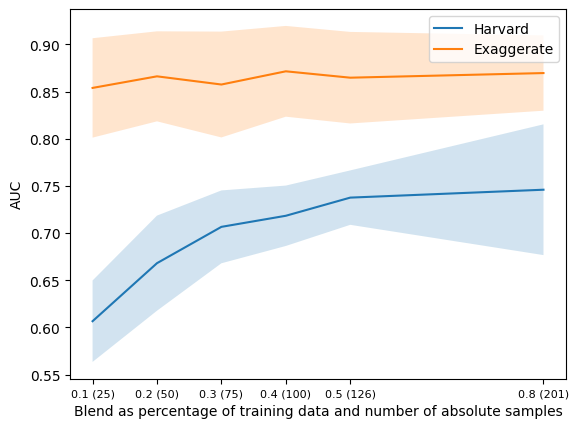

In [14]:
from sklearn import metrics
# exaggerate => harvard
print(harvard.shape)
print(exaggerate.shape)


relevant_vars = harvard.columns #['diabetes', 'waking_up_at_night', 'wheezing','gold', 'target']
aucs_harvard_fold = []
aucs_exaggerate_fold = []
for i in range(50):
    # sample as many records as there are in harvard
    exaggerate_subset = exaggerate.sample(n=len(harvard), random_state=42)[harvard.columns]
    blend_percentages = [0.1, 0.2, 0.3, 0.4, 0.5, 0.8]
    blend_absolute = []
    aucs_harvard = []
    aucs_exaggerate = []
    for blend_percentage in blend_percentages:
        num_to_add = blend_percentage * len(exaggerate_subset)
        blend_absolute.append(num_to_add)
        percentage_harvard = num_to_add / len(harvard)

        # split harvard into blending and test set
        blending_harvard, testing_harvard = train_test_split(harvard, test_size=1-percentage_harvard)
        training_exaggerate, testing_exaggerate = train_test_split(exaggerate_subset, test_size=0.2)
        # drop columns not in relevant vars
        blending_harvard = blending_harvard[relevant_vars]
        testing_harvard = testing_harvard[relevant_vars]
        exaggerate_training_selection = training_exaggerate[relevant_vars]
        exaggerate_testing_selection = testing_exaggerate[relevant_vars]

        blended = pd.concat([exaggerate_training_selection, blending_harvard])

        # train on exaggerate dataset
        X_train = blended.drop(columns=['target'], axis=1)
        # print Na values in X_train

        # X_train = X_train[relevant_vars]
        y_train = blended['target']

        X_test_harvard = testing_harvard.drop(columns=['target'], axis=1)
        # X_test = X_test[relevant_vars]
        y_test_harvard = testing_harvard['target']

        X_test_exaggerate = exaggerate_testing_selection.drop(columns=['target'], axis=1)
        y_test_exaggerate = exaggerate_testing_selection['target']

        clf = RandomForestClassifier()
        clf.fit(X_train, y_train)
        y_pred_harvard = clf.predict(X_test_harvard)
        
        y_pred_exaggerate = clf.predict(X_test_exaggerate)
        # calculate AUC for harvard
        fpr, tpr, thresholds = metrics.roc_curve(y_test_harvard, y_pred_harvard)
        auc = metrics.auc(fpr, tpr)
        aucs_harvard.append(auc)
        # calculate accuracy for harvard
        # print("Accuracy:", metrics.accuracy_score(y_test_harvard, y_pred_harvard))


        # calculate AUC for exaggerate
        fpr, tpr, thresholds = metrics.roc_curve(y_test_exaggerate, y_pred_exaggerate)
        auc = metrics.auc(fpr, tpr)
        aucs_exaggerate.append(auc)
    aucs_harvard_fold.append(aucs_harvard)
    aucs_exaggerate_fold.append(aucs_exaggerate)

# get the mean AUC for each blend percentage
aucs_harvard_mean = np.mean(aucs_harvard_fold, axis=0)
aucs_exaggerate_mean = np.mean(aucs_exaggerate_fold, axis=0)
aucs_harvard_std = np.std(aucs_harvard_fold, axis=0)
aucs_exaggerate_std = np.std(aucs_exaggerate_fold, axis=0)

# plot mean and fill between upper and lower bound
plt.plot(blend_percentages, aucs_harvard_mean, label="Harvard")
plt.fill_between(blend_percentages, aucs_harvard_mean - aucs_harvard_std, aucs_harvard_mean + aucs_harvard_std, alpha=0.2)
plt.plot(blend_percentages, aucs_exaggerate_mean, label="Exaggerate")
plt.fill_between(blend_percentages, aucs_exaggerate_mean - aucs_exaggerate_std, aucs_exaggerate_mean + aucs_exaggerate_std, alpha=0.2)


# plt.plot(blend_percentages, aucs_harvard, label="Harvard")
# plt.plot(blend_percentages, aucs_exaggerate, label="exaggerate")
# set x-axis ticks
plt.xticks(blend_percentages, [str(blend_percentages[i]) + " (" + str(int(blend_absolute[i])) + ")" for i in range(len(blend_percentages))])
# make x ticks smaller
plt.xticks(fontsize=8)
plt.xlabel("Blend as percentage of training data and number of absolute samples")
plt.ylabel("AUC")
plt.legend()
plt.show()

### Simple

In [51]:
# exaggerate => harvard


relevant_vars = harvard.columns #['diabetes', 'waking_up_at_night', 'wheezing','gold', 'target']

# take a subsection of x percent of exaggerate


num_to_add = 35 #0.01 * len(exaggerate)
percentage_harvard = num_to_add / len(harvard)
print(percentage_harvard)
# split harvard into blending and test set
blending, testing = train_test_split(harvard, test_size=1-percentage_harvard)

# drop columns not in relevant vars
blending = blending[relevant_vars]
testing = testing[relevant_vars]
exaggerate_selection = exaggerate[relevant_vars][:50]

print(blending.columns)

blended = pd.concat([exaggerate_selection, blending])

# train on exaggerate dataset
X_train = blended.drop(columns=['target'], axis=1)
# print Na values in X_train

# X_train = X_train[relevant_vars]
y_train = blended['target']

X_test = testing.drop(columns=['target'], axis=1)
# X_test = X_test[relevant_vars]
y_test = testing['target']

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

0.1388888888888889
Index(['age', 'bmi', 'cancer', 'diabetes', 'dyspnoea', 'fever', 'gender',
       'heart_failure', 'hypertension', 'mmrc', 'myocardial_infarct', 'stroke',
       'target'],
      dtype='object')
Accuracy: 0.6082949308755761


### Neural Network

0.6944444444444444
Index(['age', 'bmi', 'cancer', 'diabetes', 'dyspnoea', 'fever', 'gender',
       'heart_failure', 'hypertension', 'mmrc', 'myocardial_infarct', 'stroke',
       'target'],
      dtype='object')


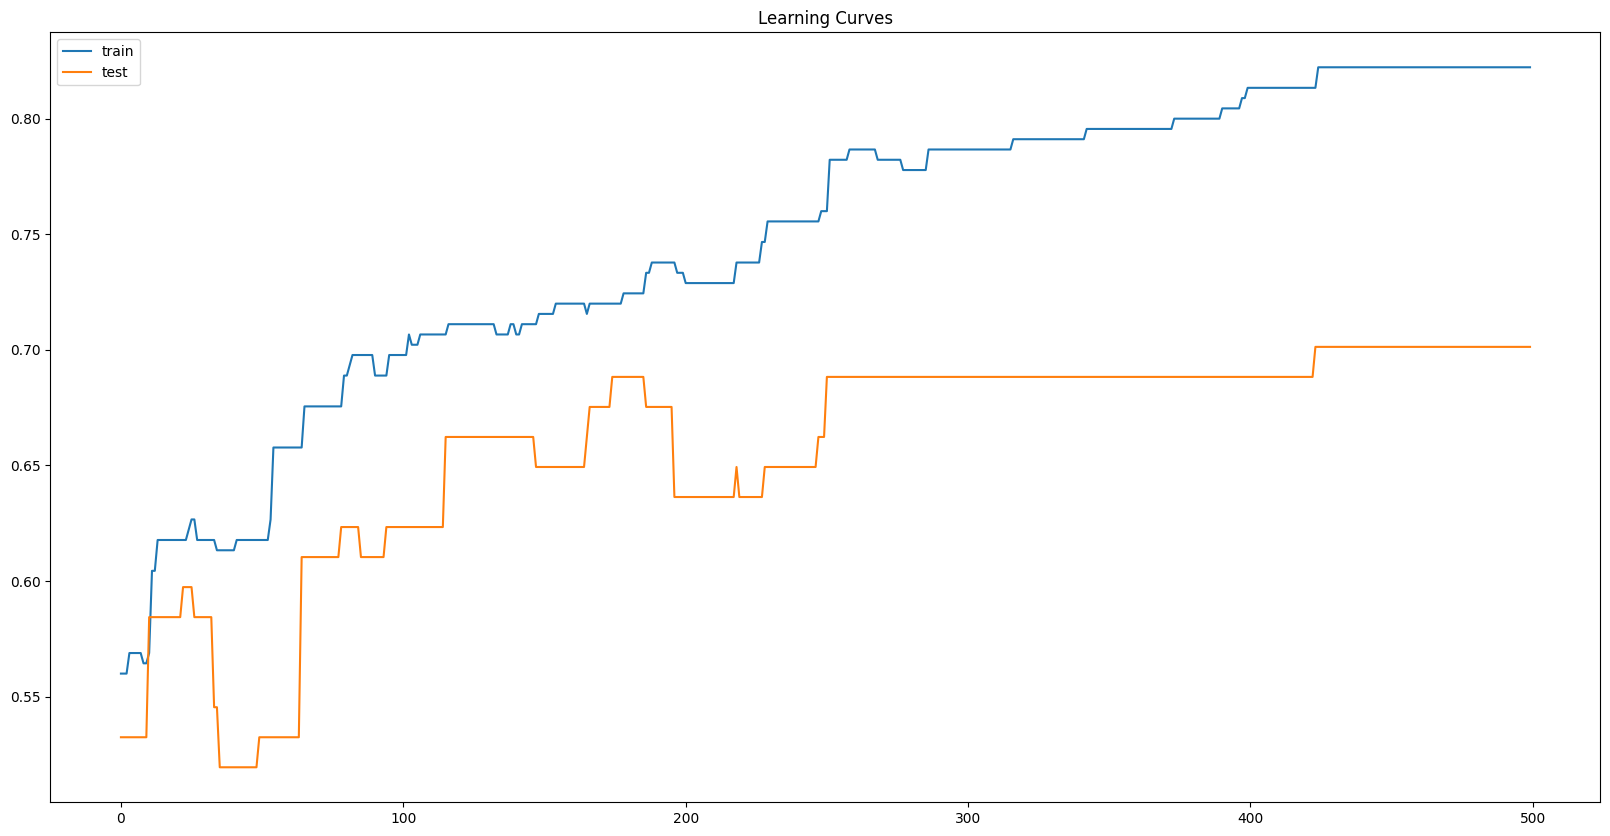

In [9]:
relevant_vars = harvard.columns #['diabetes', 'waking_up_at_night', 'wheezing','gold', 'target']

# take a subsection of x percent of exaggerate


num_to_add = np.round(0.1 * len(exaggerate))
percentage_harvard = num_to_add / len(harvard)
print(percentage_harvard)
# split harvard into blending and test set
blending, testing = train_test_split(harvard, test_size=1-percentage_harvard)

# drop columns not in relevant vars
blending = blending[relevant_vars]
testing = testing[relevant_vars]
exaggerate_selection = exaggerate[relevant_vars][:50]

print(blending.columns)

blended = pd.concat([exaggerate_selection, blending])

# train on exaggerate dataset
X_train = blended.drop(columns=['target'], axis=1)
# print Na values in X_train

# X_train = X_train[relevant_vars]
y_train = blended['target']

X_test = testing.drop(columns=['target'], axis=1)
# X_test = X_test[relevant_vars]
y_test = testing['target']

# create a keras model with 12 input features and a binary output
model = keras.Sequential()
model.add(keras.layers.Dense(12, input_dim=12, activation='relu'))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, 
          epochs=500, 
          batch_size=1000, 
          validation_data=(X_test, y_test),
          verbose=0)

# plot the learning curves
fig = plt.figure(figsize=(20,10))
plt.title("Learning Curves")
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

### Brute Force

In [ ]:
from IPython.utils import io

# split harvard into blending and validation
blend_percentages = [0, 3, 5, 15, 25]
classifiers = [XGBClassifier(), RandomForestClassifier(),  KNeighborsClassifier()]
results = pd.DataFrame(columns=['combination', 'blend', 'acc_exaggerate', 'acc_harvard', 'model', 'parameters'])
selection = exaggerate.columns


relevant_vars = ['gender', 'age', 'bmi', 'hypertension', 'diabetes', 'heart_failure', 'mmrc', 'fever',  'dyspnoea', 'cancer', 'myocardial_infarct', 'stroke']

# get all possible sets of relevant variables
all_combinations = []
for i in range(1, len(relevant_vars)+1):
    combinations_object = itertools.combinations(relevant_vars, i)
    combinations_list = list(combinations_object)
    all_combinations += combinations_list

for i, selection in enumerate(all_combinations):
    selection = list(selection)
    selection.append('target')
    exaggerate_selection = exaggerate[selection]
    harvard_selection = harvard[selection]
    for percentage in blend_percentages:
        # split into blending and validation
        harvard_blending, harvard_validation = pd.DataFrame(columns=harvard_selection.columns), pd.DataFrame(columns=harvard_selection.columns)
        if percentage != 0:
            harvard_blending, harvard_validation = train_test_split(harvard_selection, test_size=1-percentage/100, random_state=42)
        else:
            harvard_validation = harvard_selection

        X_test = harvard_validation.drop(columns=['target']).to_numpy()
        y_test = harvard_validation['target'].to_numpy()
        # create X_train from harvard_blending and exaggerate
        X_train = pd.concat([harvard_blending.drop(columns=['target']), exaggerate_selection.drop(columns=['target'])]).to_numpy()
        # create y_train from harvard_blending and exaggerate
        y_train = pd.concat([harvard_blending['target'], exaggerate_selection['target']]).to_numpy()
        for clf in classifiers:
            # perform grid search
            if clf.__class__.__name__ == 'XGBClassifier':
                clf = XGBClassifier()
                parameters = {
                    'max_depth': [5, 10, 25],
                    'learning_rate': [.01, .05, .1, .2],
                    'n_estimators': [5, 10, 25, 75, 100, 300]
                }
                grid_search = GridSearchCV(
                    estimator=clf,
                    param_grid=parameters,
                    scoring = 'accuracy',
                    n_jobs = -1,
                    # specify validation set as the validation set above (harvard_validation) and 
                    cv=4,
                    # verbose=True,
                    
                    error_score='raise'
                )
                grid_search.fit(X_train, y_train)
                clf = grid_search
            if clf.__class__.__name__ == 'RandomForestClassifier':
                clf = RandomForestClassifier()
                parameters = {
                    'max_depth': [5, 10, 25],
                    'max_features': [.3, .5, .7],
                    'n_estimators': [5, 10, 25, 75, 100, 300]
                }
                grid_search = GridSearchCV(
                    estimator=clf,
                    param_grid=parameters,
                    scoring = 'accuracy',
                    n_jobs = -1,
                    cv=4,
                    # verbose=True,
                    error_score='raise'
                )
                grid_search.fit(X_train, y_train)
                clf = grid_search
            if clf.__class__.__name__ == 'KNeighborsClassifier':
                clf = KNeighborsClassifier()
                parameters = {
                    'n_neighbors': [3, 5, 7, 9],
                }
                grid_search = GridSearchCV(
                    estimator=clf,
                    param_grid=parameters,
                    scoring = 'accuracy',
                    n_jobs = -1,
                    cv=4,
                    # verbose=True,
                    error_score='raise'
                )
                grid_search.fit(X_train, y_train)
                clf = grid_search
            y_pred_harvard = clf.predict(X_test)
            accuracy_harvard = accuracy_score(y_test, y_pred_harvard)
            y_pred_exaggerate = clf.predict(exaggerate_selection.drop(columns=['target']).to_numpy())
            accuracy_exaggerate = accuracy_score(exaggerate_selection['target'].to_numpy(), y_pred_exaggerate)
            # add a new row to the results dataframe using pd.concat
            results = pd.concat([results, pd.DataFrame([[selection, percentage, accuracy_exaggerate, accuracy_harvard, clf.__class__.__name__, clf.best_params_]], columns=results.columns)])
            print(results)


    # print something if multiples of 1% are done
    if i % np.floor(len(all_combinations) / 100) == 0:
        print(f'{i / len(all_combinations) * 100}% done')
        results.to_csv('./results/exaggerate_harvard_2.csv', sep=';', index=False)
        # print row with best acc_mean
        print(results.loc[results['acc_harvard'].idxmax()])

results.to_csv('./results/exaggerate_harvard_2.csv', sep=';', index=False)

# Evaluation and Plotting

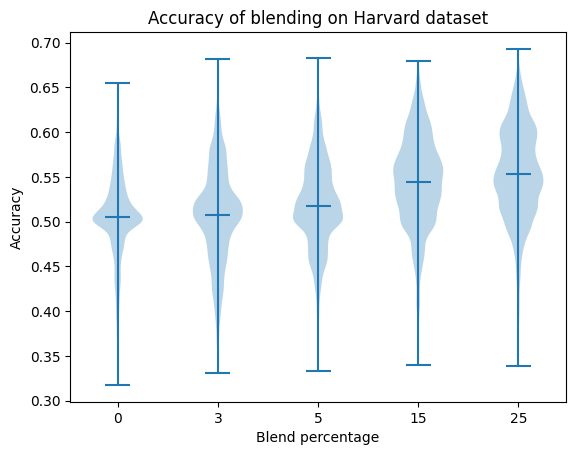

In [70]:
# plot distributions of blending
results = pd.read_csv('./results/exaggerate_harvard_2.csv', sep=';')

# get all different blends
blends_percentages = results['blend'].unique()
blends = []
for blend in blend_percentages:
    blends.append(results[results['blend'] == blend])

# plot the violin plots for each blend in one plot. Keep x points equidistant
fig, ax = plt.subplots()
ax.violinplot([blends[0]['acc_harvard'], blends[1]['acc_harvard'], blends[2]['acc_harvard'], blends[3]['acc_harvard'], blends[4]['acc_harvard']], [1, 2, 3, 4, 5], showmeans=True)
ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels(blends_percentages)
ax.set_xlabel('Blend percentage')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of blending on Harvard dataset')
plt.savefig('./results/exaggerate_harvard_2.png')

plt.show()

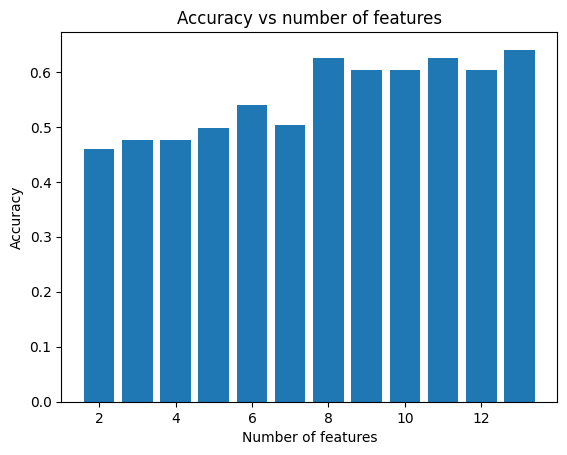

In [75]:
# investigate impact of feature selection on accuracy

# # get the accuracy for each feature
# feature_accuracies = {}
# # go through each row in results
# for index, row in results.iterrows():
#     # get the features used in this row
#     features = row['combination'].replace('[', '').replace(']', '').replace('\'', '').replace(' ', '').split(',')
#     # go through each feature
#     for feature in features:
#         # if the feature is not in the dictionary then add it
#         if feature not in feature_accuracies:
#             feature_accuracies[feature] = []
#         # add the accuracy to the list of accuracies for this feature
#         feature_accuracies[feature].append(row['acc_harvard'])

# # print descriptive statistics for each feature
# for feature in feature_accuracies:
#     # plot distribution of each feature
#     plt.figure()
#     plt.hist(feature_accuracies[feature])
#     plt.title(feature)
#     plt.xlabel('Accuracy')
#     plt.ylabel('Frequency')
# plt.show()

number_of_features = {}
# go through each row in results
for index, row in results.iterrows():
    # get the number of features used in this row
    nr_features = len(row['combination'].replace('[', '').replace(']', '').replace('\'', '').replace(' ', '').split(','))
    # get the accuracy of this row
    accuracy = row['acc_harvard']
    number_of_features[nr_features] = accuracy

# plot a histogram of the accuracy vs number of features
plt.figure()
plt.bar(number_of_features.keys(), number_of_features.values())
plt.title('Accuracy vs number of features')
plt.xlabel('Number of features')
plt.ylabel('Accuracy')
plt.show()


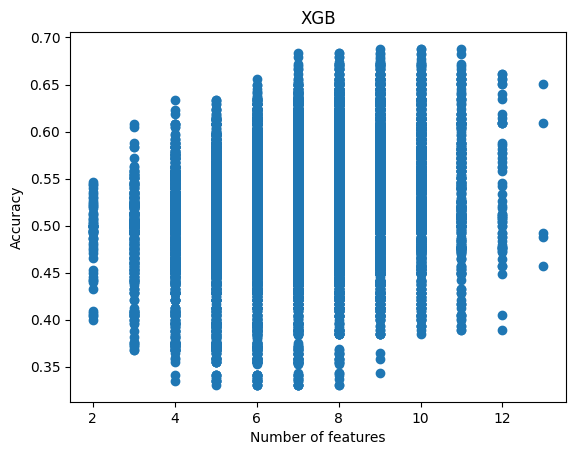

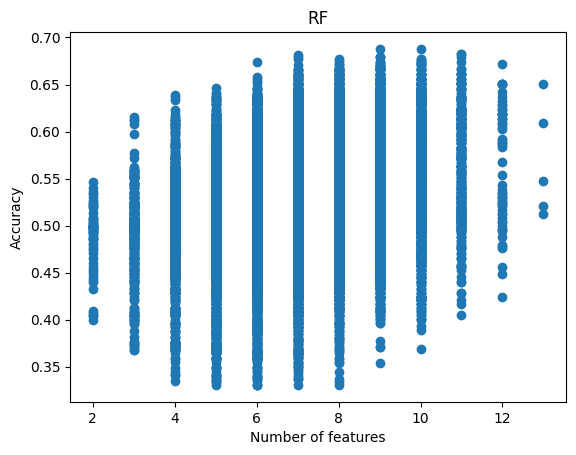

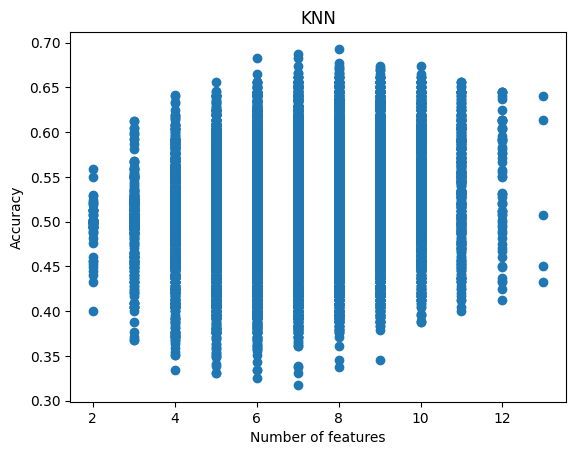

In [87]:
# examine impact of models
models = ['XGB', 'RF', 'KNN']
model_accuracies = {}
number_of_features = {"XGB": [], "RF": [], "KNN": []}
# go through each row in results
for index, row in results.iterrows():
    model = ""
    # if parameters contains n_neighbors then it is a KNN model
    if 'n_neighbors' in row['parameters']:
        model = 'KNN'
    # if parameters contains learning_rate then it is a XGB model
    elif 'learning_rate' in row['parameters']:
        model = 'XGB'
    else :
        model = 'RF'
    
    # if the model is not in the dictionary then add it
    if model not in model_accuracies:
        model_accuracies[model] = []
    # add the accuracy to the list of accuracies for this model
    model_accuracies[model].append(row['acc_harvard'])
    # get the number of features used in this row
    nr_features = len(row['combination'].replace('[', '').replace(']', '').replace('\'', '').replace(' ', '').split(','))
    number_of_features[model].append(nr_features)
    
# plot strip plot for each model with number of features on the x axis and accuracy on the y axis
for model in models:
    plt.figure()
    plt.title(model)
    plt.xlabel('Number of features')
    plt.ylabel('Accuracy')
    plt.scatter(number_of_features[model], model_accuracies[model])
plt.show()

    






In [ ]:
# blending